# MSDS622 Data Visualization Final Project
### Tomohiko Ishihara

Data Links: 
* US wildfire data: https://www.kaggle.com/tracy2533/us-wildfire
* US drought data: https://www.kaggle.com/us-drought-monitor/united-states-droughts-by-county

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

# Data loading and preprocessing

In [2]:
# Wildfire data

fires = pd.read_csv("Fires.csv", sep='\t')

# Mapping states to census regions.
pacific = 'CA OR WA AK HI'.split()
west = 'MT ID WY NV UT CO AZ NM'.split()
midwest = 'ND MN SD NE IA KS MO WI IL IN MI OH'.split()
south = 'OK TX AR LA DE MD DC VA WV NC SC GA FL KY TN AL MS'.split()
northeast = 'ME NH VT MA CT RI NJ NY PA'.split()

region_dict = {}
for state in pacific:
    region_dict[state] = 'Pacific'
for state in west:
    region_dict[state] = 'West'
for state in midwest:
    region_dict[state] = 'Midwest'
for state in south:
    region_dict[state] = 'South'
for state in northeast:
    region_dict[state] = 'Northeast'

fires['REGION'] = fires['STATE'].map(region_dict)

fires['DISCOVERY_DOY_td'] = pd.to_timedelta(fires['DISCOVERY_DOY'], unit='D')
fires['DISCOVERY_DATE'] = pd.to_datetime(fires['FIRE_YEAR'], format='%Y') + fires['DISCOVERY_DOY_td']
fires['month'] = fires['DISCOVERY_DATE'].map(lambda x: x.month)
fires['year'] = fires['FIRE_YEAR']

fires.head()

/home/tomo/anaconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,REGION,DISCOVERY_DOY_td,month,year
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2005-02-03,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,Pacific,33 days,2,2005
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2004-05-13,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,Pacific,133 days,5,2004
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2004-06-01,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,Pacific,152 days,6,2004
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2004-06-29,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,Pacific,180 days,6,2004
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2004-06-29,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,Pacific,180 days,6,2004


In [3]:
# Droughts data

droughts = pd.read_csv("us-droughts.csv")

droughts['releaseDate'] = pd.to_datetime(droughts['releaseDate'])
droughts['month'] = droughts['releaseDate'].map(lambda x: x.month)
droughts['year'] = droughts['releaseDate'].map(lambda x: x.year)

# Mapping states to census regions.
droughts['REGION'] = droughts['state'].map(region_dict)

droughts.head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID,month,year,REGION
0,2000-11-07,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1,11,2000,Pacific
1,2000-10-31,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1,10,2000,Pacific
2,2000-10-24,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1,10,2000,Pacific
3,2000-10-17,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1,10,2000,Pacific
4,2000-10-10,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1,10,2000,Pacific


In [4]:
# Mapping regions to colors (to keep them consistent across different plots)

all_regions = ['Midwest', 'Northeast', 'Pacific', 'South', 'West']
colors = ['red', 'blue', 'green', 'purple', 'orange']
region_colors_dict = dict(zip(all_regions, colors))

# 1.) Histogram of Reported Fires by Day of Year

/home/tomo/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


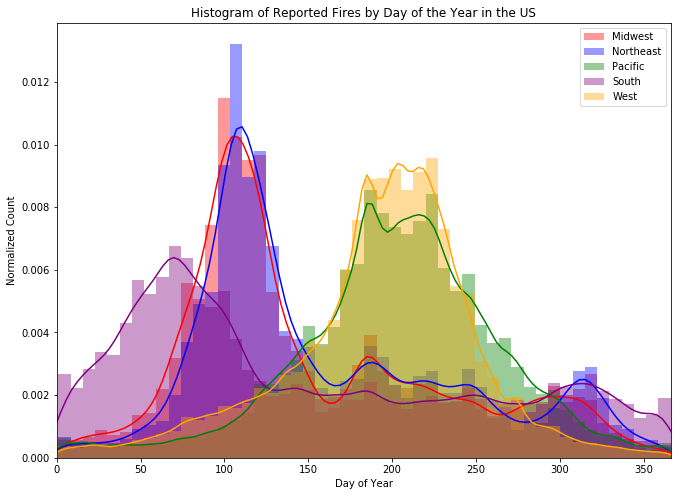

In [5]:
fig, ax = plt.subplots(figsize=(11, 8))

for color, region in zip(colors, all_regions):
    sns.distplot(fires[fires['REGION'] == region]['DISCOVERY_DOY'], ax=ax, color=color, label=region)
ax.set_xlim([0, 366])
ax.set_xlabel("Day of Year")
ax.set_ylabel("Normalized Count")
ax.set_title("Histogram of Reported Fires by Day of the Year in the US")

plt.legend()
plt.show()

# 2.) Streamgraph of number of reported fires by year per census region.

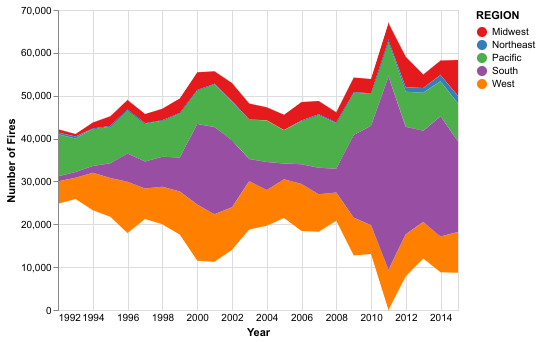

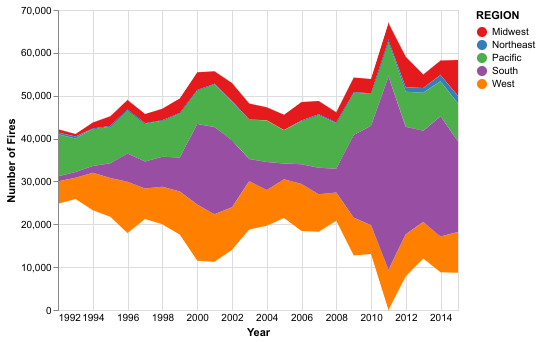

In [6]:
import altair as alt
alt.data_transformers.enable('csv')
alt.renderers.enable('notebook')

unique_fires = fires[['FIRE_YEAR','FIRE_NAME','STATE', 'REGION']].drop_duplicates()
unique_fires.dropna(subset=['REGION'], inplace=True)
unique_fires.shape

alt.Chart(unique_fires).mark_area().encode(
    alt.X('FIRE_YEAR:T',
         axis=alt.Axis(format='%Y', domain=False, 
                       tickSize=0, title='Year')
    ),
    alt.Y('count():Q', stack='center', 
          axis=alt.Axis(title='Number of Fires')),
    alt.Color('REGION:N', scale=alt.Scale(scheme='set1'))
    )

# 3.) Barplot of number of fires by cause

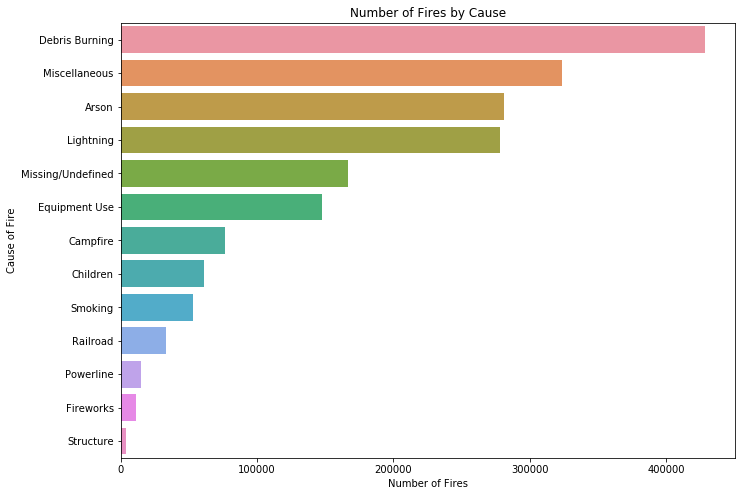

In [7]:
fire_causes_cnt = fires.groupby("STAT_CAUSE_DESCR").size()
fire_causes_cnt = fire_causes_cnt.reset_index().rename({0: "count"}, axis=1)
fire_causes_cnt = fire_causes_cnt.sort_values("count", ascending=False)
fig, ax = plt.subplots(figsize=(11, 8))
sns.barplot("count", "STAT_CAUSE_DESCR", data=fire_causes_cnt, ax=ax)
ax.set_ylabel("Cause of Fire")
ax.set_xlabel("Number of Fires")
ax.set_title("Number of Fires by Cause")
plt.show()

# 4.) Boxplot of size of fire by region

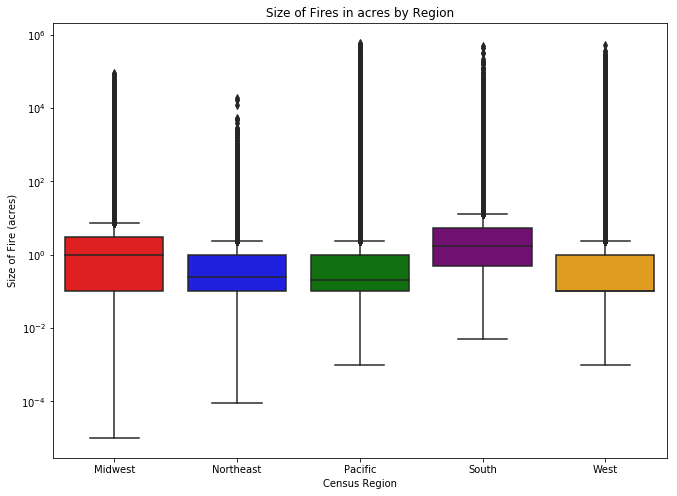

In [8]:
fig, ax = plt.subplots(figsize=(11, 8))
fires_boxplot = fires[["REGION", "STAT_CAUSE_DESCR", "FIRE_SIZE"]]

sns.boxplot("REGION", "FIRE_SIZE", data=fires_boxplot, ax=ax,
           order=all_regions, palette=region_colors_dict)
ax.set_yscale("log")
ax.set_xlabel("Census Region")
ax.set_ylabel("Size of Fire (acres)")
ax.set_title("Size of Fires in acres by Region")
plt.show()

# 5.) Scatterplot of number of fires vs drought in each census region

In [9]:
droughts_by_region = droughts.groupby(['REGION', 'month', 'year'])['D0'].mean().reset_index()
droughts_by_region.rename({'D0': 'pct_drought'}, axis=1, inplace=True)

fires_by_region = fires.groupby(['REGION', 'month', 'year'])['FIRE_SIZE'].mean().reset_index()

fires_droughts_region = fires_by_region.merge(droughts_by_region, on=['REGION', 'month', 'year'])

/home/tomo/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


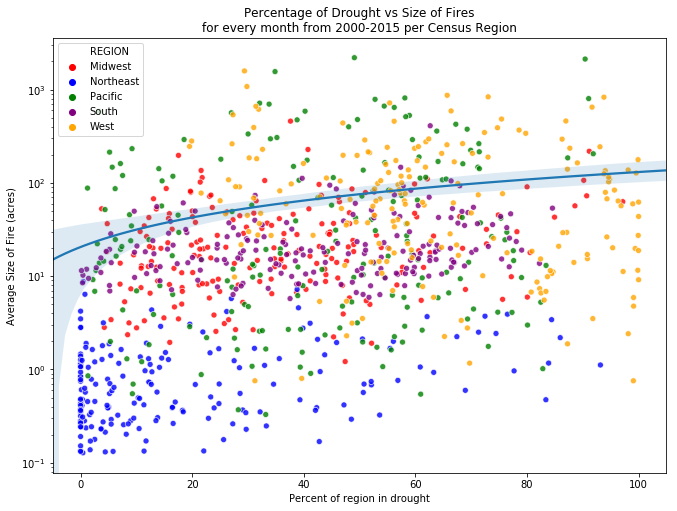

In [10]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.scatterplot("pct_drought", "FIRE_SIZE", data=fires_droughts_region, hue="REGION", 
                hue_order=all_regions, palette=region_colors_dict, alpha=0.8, ax=ax)
sns.regplot("pct_drought", "FIRE_SIZE", data=fires_droughts_region,
            scatter=False, ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Percent of region in drought")
ax.set_ylabel("Average Size of Fire (acres)")
ax.set_title("Percentage of Drought vs Size of Fires\nfor every month from 2000-2015 per Census Region")
plt.show()

 # 6.) Chloropleth map of drought in each state (and interactive plot)

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
cufflinks.set_config_file(world_readable=True, theme='pearl')
init_notebook_mode(connected=True)

import plotly
plotly.tools.set_credentials_file(username='tishihar94', api_key='U28TQB1yXwEkAezy3zme')

In [12]:
droughts_by_state = droughts.groupby(['REGION', 'state', 'month', 'year'])['D0'].mean().reset_index()
droughts_by_state.rename({'D0': 'pct_drought'}, axis=1, inplace=True)

droughts_avg_state = droughts_by_state.groupby(['REGION', 'state'])['pct_drought'].mean().reset_index()

chloropleth_text =  [f"Region: {region}<br>State: {state}<br>Percent Drought: {np.round(pct_drought, 4)}%" 
                     for region,state,pct_drought in droughts_avg_state[['REGION', 'state', 'pct_drought']].values]

data = [go.Choropleth(
            locations = droughts_avg_state['state'],
            z = droughts_avg_state['pct_drought'],
            locationmode = 'USA-states',
            text = chloropleth_text,
            colorscale = 'Bluered',
            marker = go.choropleth.Marker(
                line = go.choropleth.marker.Line(
                    color = 'rgb(255,255,255)',
                    width = 2
                )),
            colorbar = go.choropleth.ColorBar(
                title = "Percent of State in Drought"
                )
        )]

layout = go.Layout(
    title='Average Percent of State in Drought (2000-2016)',
    autosize=True,
    hovermode='closest',
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 7.) Bubble map of number of fires per state


In [13]:
fires_per_state = fires.groupby(['REGION', 'STATE']).size().reset_index().rename({0: 'count'}, axis=1)
text = [f"Region: {region}<br>Num Fires: {count}"
        for region, state, count in fires_per_state.values]

scale = 150

data = [go.Scattergeo(
            locationmode = 'USA-states',
            locations = fires_per_state['STATE'],
            text=text,
            marker = go.scattergeo.Marker(
                size = fires_per_state['count']/scale,
                line = go.scattergeo.marker.Line(
                    width=0.5, color='rgb(40,40,40)'
                ),
                color=fires_per_state['count'],
                colorscale='Bluered',
                sizemode = 'area'
            ),
            name='Number of Fires'
        )]

layout = go.Layout(
        title = go.layout.Title(
            text = 'Total Number of Fires from 1992-2015 per State'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 8.) Treemap of number of fires per census region

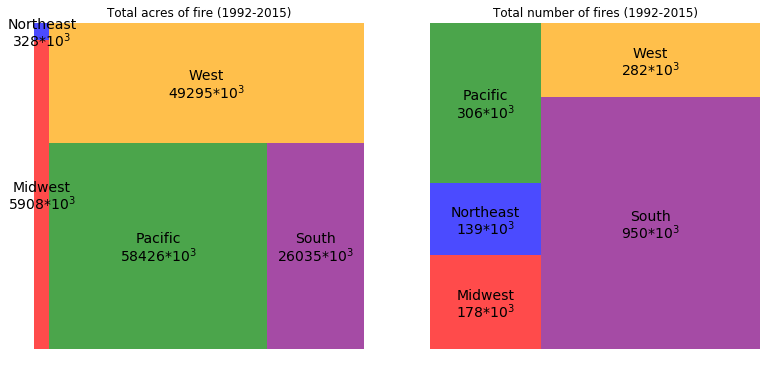

In [14]:
import squarify
fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

fire_size_per_region = fires.groupby('REGION')['FIRE_SIZE'].sum().reset_index()
fire_size_per_region.sort_values('REGION', inplace=True)
fire_size_per_region['text'] = (fire_size_per_region['FIRE_SIZE'] / 1000).astype(int).astype(str) + '$*10^3$'

squarify.plot(sizes=fire_size_per_region['FIRE_SIZE'], label=fire_size_per_region['REGION'], color=colors, alpha=.7,
              value=fire_size_per_region['text'], ax=ax[0], text_kwargs={'size': 14})
ax[0].axis('off')
ax[0].set_title("Total acres of fire (1992-2015)")

fires_per_region = fires.groupby('REGION').size().reset_index().rename({0: 'num_fires'}, axis=1)
fires_per_region.sort_values('REGION', inplace=True)
fires_per_region['text'] = (fires_per_region['num_fires'] / 1000).astype(int).astype(str) + '$*10^3$'

squarify.plot(sizes=fires_per_region['num_fires'], label=fires_per_region['REGION'], color=colors, alpha=.7,
              value=fires_per_region['text'], ax=ax[1], text_kwargs={'size': 14})
ax[1].axis('off')
ax[1].set_title("Total number of fires (1992-2015)")
plt.show()

# 9.) Connection map.

In [15]:
state_lat_lon = pd.read_csv('statelatlong.csv').rename({'State': 'STATE'}, axis=1)

big_fires = fires[fires['FIRE_SIZE_CLASS'].isin(list("FG"))]
big_fires_per_state = big_fires.groupby(['STATE']).size().reset_index().rename({0: 'num_fires'}, axis=1)

big_fires_per_state = big_fires_per_state.merge(state_lat_lon, on="STATE").sort_values('num_fires', ascending=False)

big_fires_per_state = pd.concat([big_fires_per_state,
                                big_fires_per_state[['Latitude', 'Longitude']]
                                    .shift()
                                    .rename({'Latitude': "End_Latitude",
                                             'Longitude': "End_Longitude"}, axis=1)],
                                axis=1)
                            

In [16]:
text = [f"State: {state}<br>Number of Fires: {num_fires}" for state, num_fires in big_fires_per_state[['STATE', 'num_fires']].values]

states = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = big_fires_per_state['Longitude'],
    lat = big_fires_per_state['Latitude'],
    hoverinfo = 'text',
    text = text,
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 3,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

connections = []
for i in range(len(big_fires_per_state)):
    connections.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lat = [big_fires_per_state['Latitude'][i], big_fires_per_state['End_Latitude'][i]],
            lon = [big_fires_per_state['Longitude'][i], big_fires_per_state['End_Longitude'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 2,
                color = 'red',
            ),
            opacity = float(big_fires_per_state['num_fires'][i]) / float(big_fires_per_state['num_fires'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = 'US States ranked by number of class F and G wildfires (1992-2016)'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = connections + states, layout = layout)
iplot(fig)

# 10.) Heat map

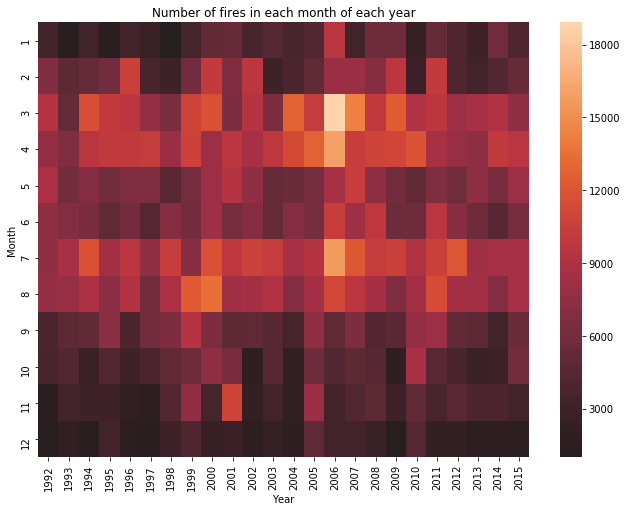

In [51]:
fires_per_month_year = fires.groupby(['month', 'year']).size().reset_index().rename({0: 'num_fires'}, axis=1)

fig, ax = plt.subplots(figsize=(11, 8))

sns.heatmap(fires_per_month_year.pivot('month', 'year', 'num_fires'), center=0, ax=ax)
ax.set_ylabel("Month")
ax.set_xlabel("Year")
ax.set_title("Number of fires in each month of each year")
plt.show()